# <font color='#d50283'>IT Academy - Data Science</font>
## Sprint 6. Dades, Probabilitats i Estadístiques
### Luis Ortas



***
## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import statistics
import scipy
from scipy import stats
import statistics

**Utilizaremos el datasheet "Barcelona", son datos meteorológivos de la ciudad de Barcelona desde el 1 de julio de 2008 hasta el 20 de abril de 2019**

In [2]:
df=pd.read_csv('barcelona.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          3946 non-null   object 
 1   maxtempC           3946 non-null   int64  
 2   mintempC           3946 non-null   int64  
 3   totalSnow_cm       3946 non-null   float64
 4   sunHour            3946 non-null   float64
 5   uvIndex            3946 non-null   int64  
 6   uvIndex.1          3946 non-null   int64  
 7   moon_illumination  3946 non-null   int64  
 8   moonrise           3946 non-null   object 
 9   moonset            3946 non-null   object 
 10  sunrise            3946 non-null   object 
 11  sunset             3946 non-null   object 
 12  DewPointC          3946 non-null   int64  
 13  FeelsLikeC         3946 non-null   int64  
 14  HeatIndexC         3946 non-null   int64  
 15  WindChillC         3946 non-null   int64  
 16  WindGustKmph       3946 

In [4]:
df.columns

Index(['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset',
       'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [5]:
df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,19.244045,13.475165,0.000608,10.968728,4.612772,4.612772,46.115813,11.217435,16.766853,17.521794,16.386721,15.402686,23.467055,70.396604,0.875443,1016.565383,19.244045,9.876584,194.227572,10.544349
std,5.914601,5.766123,0.024138,2.447978,1.276115,1.276115,31.285002,6.246062,7.201632,6.696775,6.660324,6.913537,20.456800,10.007276,2.429216,6.882347,5.914601,0.636629,70.642275,4.235068
min,4.000000,-2.000000,0.000000,3.400000,1.000000,1.000000,0.000000,-12.000000,-4.000000,1.000000,-4.000000,4.000000,0.000000,28.000000,0.000000,986.000000,4.000000,6.000000,16.000000,3.000000
25%,14.000000,9.000000,0.000000,9.100000,4.000000,4.000000,18.000000,7.000000,11.000000,12.000000,11.000000,11.000000,8.000000,65.000000,0.000000,1013.000000,14.000000,10.000000,139.000000,8.000000
50%,19.000000,13.000000,0.000000,11.400000,5.000000,5.000000,46.000000,11.000000,16.000000,16.000000,16.000000,13.000000,17.000000,71.000000,0.000000,1017.000000,19.000000,10.000000,206.000000,9.000000
75%,24.000000,19.000000,0.000000,11.600000,6.000000,6.000000,73.000000,17.000000,22.000000,23.000000,22.000000,18.000000,34.000000,77.000000,0.500000,1021.000000,24.000000,10.000000,249.000000,12.000000
max,34.000000,29.000000,1.100000,14.500000,8.000000,8.000000,100.000000,23.000000,36.000000,36.000000,32.000000,59.000000,100.000000,97.000000,31.500000,1040.000000,34.000000,20.000000,344.000000,39.000000


In [6]:
len(df.date_time.unique())

3946

In [7]:
df=df[['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination',  'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph']]

In [8]:
for v in df.columns:
        print ("\n" + v)
        print(df[v].describe())
        print ()


maxtempC
count    3946.000000
mean       19.244045
std         5.914601
min         4.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        34.000000
Name: maxtempC, dtype: float64


mintempC
count    3946.000000
mean       13.475165
std         5.766123
min        -2.000000
25%         9.000000
50%        13.000000
75%        19.000000
max        29.000000
Name: mintempC, dtype: float64


totalSnow_cm
count    3946.000000
mean        0.000608
std         0.024138
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.100000
Name: totalSnow_cm, dtype: float64


sunHour
count    3946.000000
mean       10.968728
std         2.447978
min         3.400000
25%         9.100000
50%        11.400000
75%        11.600000
max        14.500000
Name: sunHour, dtype: float64


uvIndex
count    3946.000000
mean        4.612772
std         1.276115
min         1.000000
25%         4.000000
50%         5.000000
75%         6.00000

Definimos el viento



In [9]:
def wind(x):
    w='N'
    if x<34:
        w='N'
    elif x>34 and x<79: # no utilizamos el igual ya que todos los datos son enteros .
        w='NE'
    elif x>79 and x<124:
        w='E'
    elif x>124 and x<169:
        w='SE'
    elif x>169 and x<214:
        w='S'
    elif x>214 and x<259:
        w='SW'
    elif x>259 and x<304:
        w='W'
    elif x>304 and x<349:
        w='W'
    elif x>349: 
        w='N'

        
   
        
    return w
df['wind']=df['winddirDegree'].apply(lambda x: wind(x))

In [10]:
df.wind.value_counts()

SW    1045
W      734
S      720
SE     596
E      466
NE     289
N       96
Name: wind, dtype: int64

Así definimos los vientos observados.

In [11]:
wind=df.groupby('wind').agg({'maxtempC':'mean', 'mintempC':'mean', 'totalSnow_cm':'mean', 'sunHour':'mean',
       'uvIndex':'mean',    'FeelsLikeC':'mean', 'HeatIndexC':'mean',
       'WindChillC':'mean', 'WindGustKmph':'mean', 'cloudcover':'mean', 'humidity':'mean', 'precipMM':'mean',
       'pressure':'mean', 'tempC':'mean', 'visibility':'mean', 'winddirDegree':'mean', 'windspeedKmph':'mean'
     })

Analizamos los datos relacionados con los vientos,

In [12]:
wind.sort_values(by='maxtempC',ascending=False)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
wind,,,,,,,,,,,,,,,,,
SE,21.080537,15.676174,0.000000,11.597148,5.020134,19.461409,19.996644,18.855705,12.182886,25.379195,72.771812,1.019799,1016.870805,21.080537,9.877517,146.744966,8.830537
S,20.648611,14.848611,0.002917,11.556667,4.884722,18.695833,19.197222,18.191667,12.700000,24.931944,71.961111,1.103889,1016.120833,20.648611,9.829167,192.787500,8.988889
E,20.446352,15.457082,0.000000,11.037339,4.849785,18.725322,19.289700,18.203863,13.313305,30.961373,73.980687,1.464378,1016.497854,20.446352,9.862661,103.096567,9.521459
SW,20.178947,13.757895,0.000287,11.493397,4.782775,17.656459,18.286124,17.240191,14.941627,17.441148,69.385646,0.487751,1016.513876,20.178947,9.937799,237.124402,10.262201
N,18.343750,12.864583,0.000000,10.468750,4.447917,15.656250,16.666667,15.270833,16.854167,24.750000,71.697917,1.080208,1016.500000,18.343750,9.843750,176.968750,11.395833
NE,17.847751,13.273356,0.000000,9.806920,4.304498,14.916955,16.024221,14.778547,22.532872,39.868512,75.335640,1.942561,1017.200692,17.847751,9.633218,61.875433,15.048443
W,14.948229,8.839237,0.000000,9.614033,3.765668,11.050409,12.359673,11.021798,19.653951,17.673025,63.982289,0.265259,1016.628065,14.948229,9.944142,285.348774,12.628065


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3946 entries, 0 to 3945
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   maxtempC           3946 non-null   int64  
 1   mintempC           3946 non-null   int64  
 2   totalSnow_cm       3946 non-null   float64
 3   sunHour            3946 non-null   float64
 4   uvIndex            3946 non-null   int64  
 5   moon_illumination  3946 non-null   int64  
 6   FeelsLikeC         3946 non-null   int64  
 7   HeatIndexC         3946 non-null   int64  
 8   WindChillC         3946 non-null   int64  
 9   WindGustKmph       3946 non-null   int64  
 10  cloudcover         3946 non-null   int64  
 11  humidity           3946 non-null   int64  
 12  precipMM           3946 non-null   float64
 13  pressure           3946 non-null   int64  
 14  tempC              3946 non-null   int64  
 15  visibility         3946 non-null   int64  
 16  winddirDegree      3946 

***
Calcularemos la  moda, la mediana, la desviacion estandar i la mitjana aritmètica.
Utilizamos la libreria statistics

In [14]:
#eliminamos wind.
df=df.drop(columns =['wind'])

In [15]:
for v in df.columns:
        print ("\n" + v+'\n')
        print(f'La moda es: {(statistics.multimode(df[v]))}')              
        print(f'La mediana es: {round(statistics.median(df[v]),2)}')
        print(f'La media aritmetica es {round(statistics.mean(df[v]),2)}')        
        print(f'La desviación estandar es {round(statistics.stdev(df[v]),2)}')
        print ()                 
              
        print ('--------------')
        


maxtempC

La moda es: [16, 15]
La mediana es: 19.0
La media aritmetica es 19.24
La desviación estandar es 5.91

--------------

mintempC

La moda es: [9]
La mediana es: 13.0
La media aritmetica es 13.48
La desviación estandar es 5.77

--------------

totalSnow_cm

La moda es: [0.0]
La mediana es: 0.0
La media aritmetica es 0.0
La desviación estandar es 0.02

--------------

sunHour

La moda es: [11.6]
La mediana es: 11.4
La media aritmetica es 10.97
La desviación estandar es 2.45

--------------

uvIndex

La moda es: [4]
La mediana es: 5.0
La media aritmetica es 4.61
La desviación estandar es 1.28

--------------

moon_illumination

La moda es: [0]
La mediana es: 46.0
La media aritmetica es 46.12
La desviación estandar es 31.29

--------------

FeelsLikeC

La moda es: [12]
La mediana es: 16.0
La media aritmetica es 16.77
La desviación estandar es 7.2

--------------

HeatIndexC

La moda es: [12]
La mediana es: 16.0
La media aritmetica es 17.52
La desviación estandar es 6.7

----------

In [16]:
for v in df.columns:
        print ("\n" + v+':'+'\n')
        print(f'La moda es: {df[v].mode()[0]}')              
        print(f'La mediana es: {round(df[v].median(),2)}')
        print(f'La media aritmetica es {round(df[v].mean(),2)}')        
        print(f'La desviación estandar es {round(df[v].std(),2)}')
        print ()                 
              
        print ('--------------')


maxtempC:

La moda es: 15
La mediana es: 19.0
La media aritmetica es 19.24
La desviación estandar es 5.91

--------------

mintempC:

La moda es: 9
La mediana es: 13.0
La media aritmetica es 13.48
La desviación estandar es 5.77

--------------

totalSnow_cm:

La moda es: 0.0
La mediana es: 0.0
La media aritmetica es 0.0
La desviación estandar es 0.02

--------------

sunHour:

La moda es: 11.6
La mediana es: 11.4
La media aritmetica es 10.97
La desviación estandar es 2.45

--------------

uvIndex:

La moda es: 4
La mediana es: 5.0
La media aritmetica es 4.61
La desviación estandar es 1.28

--------------

moon_illumination:

La moda es: 0
La mediana es: 46.0
La media aritmetica es 46.12
La desviación estandar es 31.29

--------------

FeelsLikeC:

La moda es: 12
La mediana es: 16.0
La media aritmetica es 16.77
La desviación estandar es 7.2

--------------

HeatIndexC:

La moda es: 12
La mediana es: 16.0
La media aritmetica es 17.52
La desviación estandar es 6.7

--------------

WindCh

## Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

Calcularemos la correlación de velocidad del viento con 'windspeedKmph' con percepción de temperatura, ' FeelsLikeC'

In [17]:
round(df['windspeedKmph'].corr(df['FeelsLikeC']),2)

-0.34

Existe una muy leve correlación negativa. No supera el 0.5.


***
## Exercici 3
calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.



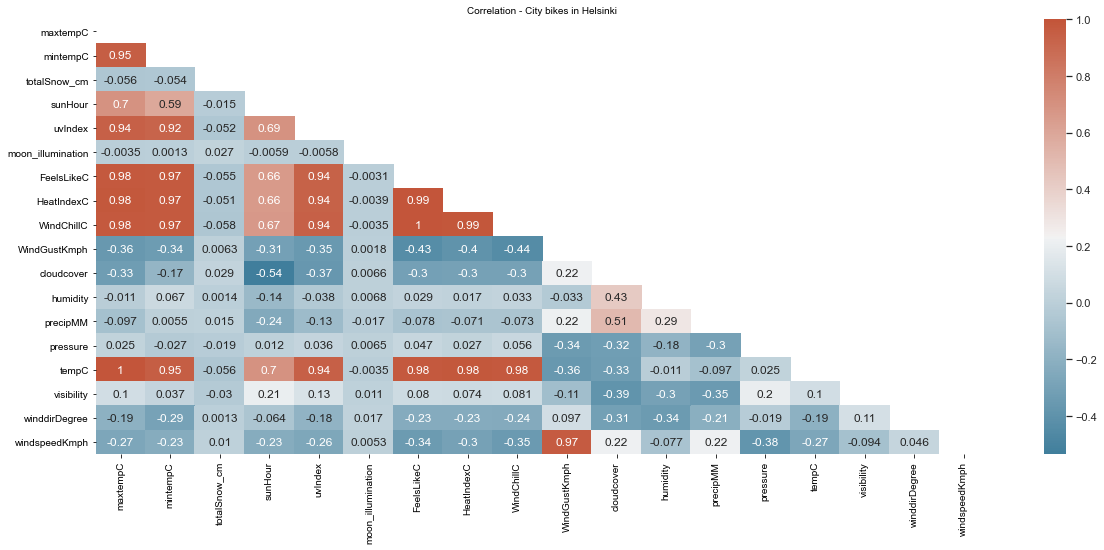

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap="Blues")

fig,ax = plt.subplots(figsize=(20,8))
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.title('Correlation - City bikes in Helsinki', fontsize = 10)
plt.show()

## Exercici 4
Selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

Utilizaremos en este caso la libreria scipy.stats

In [19]:
for v in df.columns:
        print ("\n" + v+'\n')
        print(f'La media geometrica: {round(scipy.stats.gmean(df[v]),2)}')              
        print(f'La media armonica es: {round(statistics.harmonic_mean(df[v]),2)}')
        print(f'La media aritmetica es {round(statistics.mean(df[v]),2)}') 
        
     
        print ()                 
              
        print ('--------------')


maxtempC

La media geometrica: 18.27
La media armonica es: 17.21
La media aritmetica es 19.24

--------------

mintempC

La media geometrica: nan
La media armonica es: 0
La media aritmetica es 13.48

--------------

totalSnow_cm

La media geometrica: 0.0
La media armonica es: 0
La media aritmetica es 0.0

--------------

sunHour

La media geometrica: 10.65
La media armonica es: 10.26
La media aritmetica es 10.97

--------------

uvIndex

La media geometrica: 4.42
La media armonica es: 4.19
La media aritmetica es 4.61

--------------

moon_illumination

La media geometrica: 0.0
La media armonica es: 0
La media aritmetica es 46.12

--------------

FeelsLikeC

La media geometrica: nan
La media armonica es: 0
La media aritmetica es 16.77

--------------

HeatIndexC

La media geometrica: 16.14
La media armonica es: 14.62
La media aritmetica es 17.52

--------------

WindChillC

La media geometrica: nan
La media armonica es: 0
La media aritmetica es 16.39

--------------

WindGustKmph

La m

D:\anaconda3\lib\site-packages\scipy\stats\stats.py:402: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
D:\anaconda3\lib\site-packages\scipy\stats\stats.py:402: RuntimeWarning: invalid value encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


***